In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
cats_df = pd.read_csv('../../tidy_tuesdays_original/cats_uk.csv')
cats_df.tail()

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,study_name
18210,Millie-Tag,4149497976,True,2017-11-26T15:37:52Z,-4.521489,50.869320,1260,144.66,False,False,Pet Cats United Kingdom
18211,Millie-Tag,4149497977,True,2017-11-26T15:40:59Z,-4.521498,50.869289,16380,136.60,False,False,Pet Cats United Kingdom
18212,Millie-Tag,4149497978,True,2017-11-26T16:27:31Z,-4.521803,50.869438,4500,160.97,False,False,Pet Cats United Kingdom
18213,Millie-Tag,4149497979,True,2017-11-26T16:34:26Z,-4.521946,50.869392,1044,179.81,False,False,Pet Cats United Kingdom
18214,Millie-Tag,4149497980,True,2017-11-27T00:09:29Z,-4.522027,50.869534,792,151.67,False,False,Pet Cats United Kingdom


In [3]:
type(cats_df)

pandas.core.frame.DataFrame

In [4]:
cats_ref_df = pd.read_csv('../../tidy_tuesdays_original/cats_uk_reference.csv')
cats_ref_df.head()

,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Tommy-Tag,Tommy,Felis catus,2017-06-03T01:02:09Z,2017-06-10T02:10:52Z,True,12.5,Neutered,m,12.5,2,True,True,False,UK,11.0
1,Athena,Athena,Felis catus,2017-06-24T01:02:13Z,2017-06-30T23:59:32Z,True,3.0,Spayed,f,7.5,2,True,True,False,UK,3.0
2,Ares,Ares,Felis catus,2017-06-24T01:03:57Z,2017-06-30T23:58:01Z,NaN,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,Lola,Lola,Felis catus,2017-06-24T01:18:49Z,2017-06-30T09:04:40Z,True,3.0,Spayed,f,17.5,1,True,True,False,UK,10.0
4,Maverick,Maverick,Felis catus,2017-06-25T01:04:35Z,2017-07-03T09:10:07Z,True,3.0,Neutered,m,12.5,1,True,True,True,UK,7.0


In [5]:
type(cats_df)

pandas.core.frame.DataFrame

In [6]:
cats_df.isna().sum()

tag_id                      0
event_id                    0
visible                     0
timestamp                   0
location_long               0
location_lat                0
ground_speed                0
height_above_ellipsoid      0
algorithm_marked_outlier    0
manually_marked_outlier     0
study_name                  0
dtype: int64

In [7]:
cats_ref_df.isna().sum()

tag_id                            0
animal_id                         0
animal_taxon                      0
deploy_on_date                    0
deploy_off_date                   0
hunt                              9
prey_p_month                      0
animal_reproductive_condition     3
animal_sex                        0
hrs_indoors                       0
n_cats                            0
food_dry                          0
food_wet                          0
food_other                       10
study_site                        0
age_years                         1
dtype: int64

In [8]:
cats_df.shape

(18215, 11)

In [9]:
cats_ref_df.shape

(101, 16)

In [10]:
# merge the df
cats = cats_df.merge(cats_ref_df, on="tag_id", how="left")
cats

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,...,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18210,Millie-Tag,4149497976,True,2017-11-26T15:37:52Z,-4.521489,50.869320,1260,144.66,False,False,...,7.5,Spayed,f,12.5,2,False,True,True,UK,3.0
18211,Millie-Tag,4149497977,True,2017-11-26T15:40:59Z,-4.521498,50.869289,16380,136.60,False,False,...,7.5,Spayed,f,12.5,2,False,True,True,UK,3.0
18212,Millie-Tag,4149497978,True,2017-11-26T16:27:31Z,-4.521803,50.869438,4500,160.97,False,False,...,7.5,Spayed,f,12.5,2,False,True,True,UK,3.0
18213,Millie-Tag,4149497979,True,2017-11-26T16:34:26Z,-4.521946,50.869392,1044,179.81,False,False,...,7.5,Spayed,f,12.5,2,False,True,True,UK,3.0


In [12]:
gdf = gpd.GeoDataFrame(cats, geometry=gpd.points_from_xy(cats.location_long, cats.location_lat))

In [13]:
gdf.head()

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,...,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years,geometry
0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,...,Neutered,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11385 50.17032)
1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,...,Neutered,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11385 50.17032)
2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,...,Neutered,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11373 50.16988)
3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,...,Neutered,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11377 50.16983)
4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,...,Neutered,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11425 50.17014)


<Axes: >

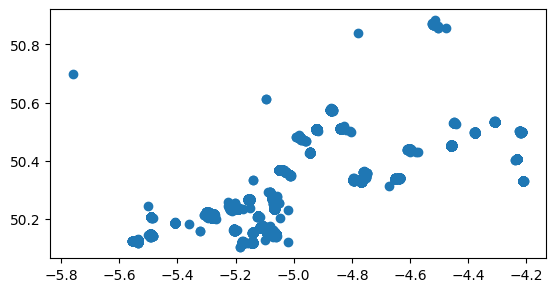

In [14]:
gdf.plot()

In [17]:
# Get World map from Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

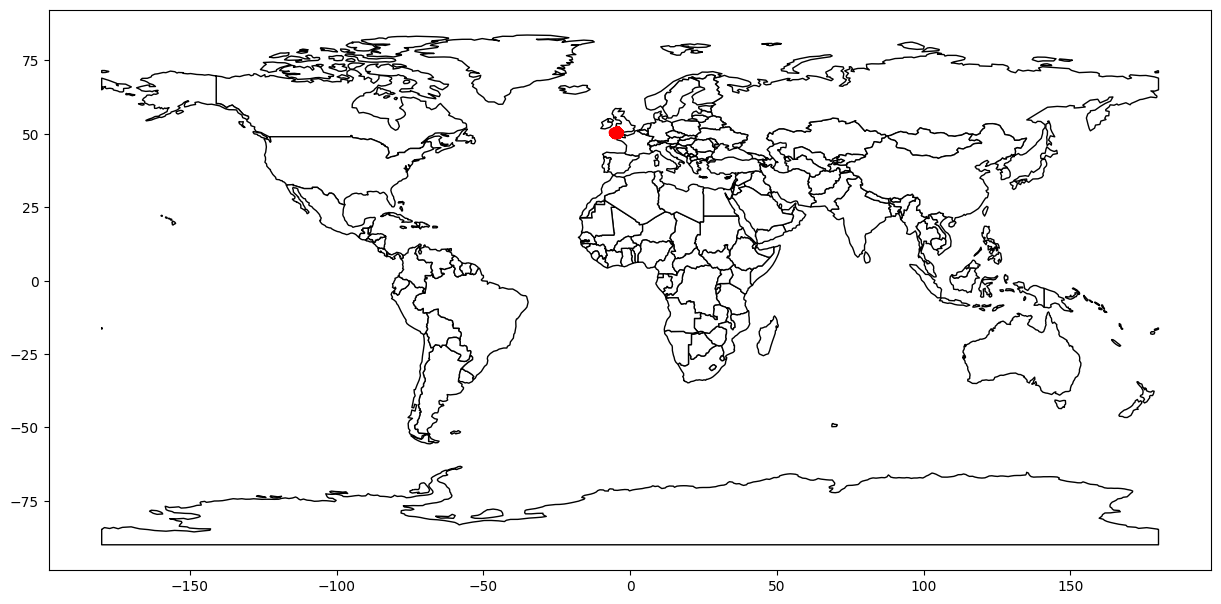

In [16]:
# We plot our gdf data on the world map.
ax = world.plot(
    color='white', edgecolor='black', figsize=(15,12))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [18]:
uk = world.loc[world['name'] == 'United Kingdom']

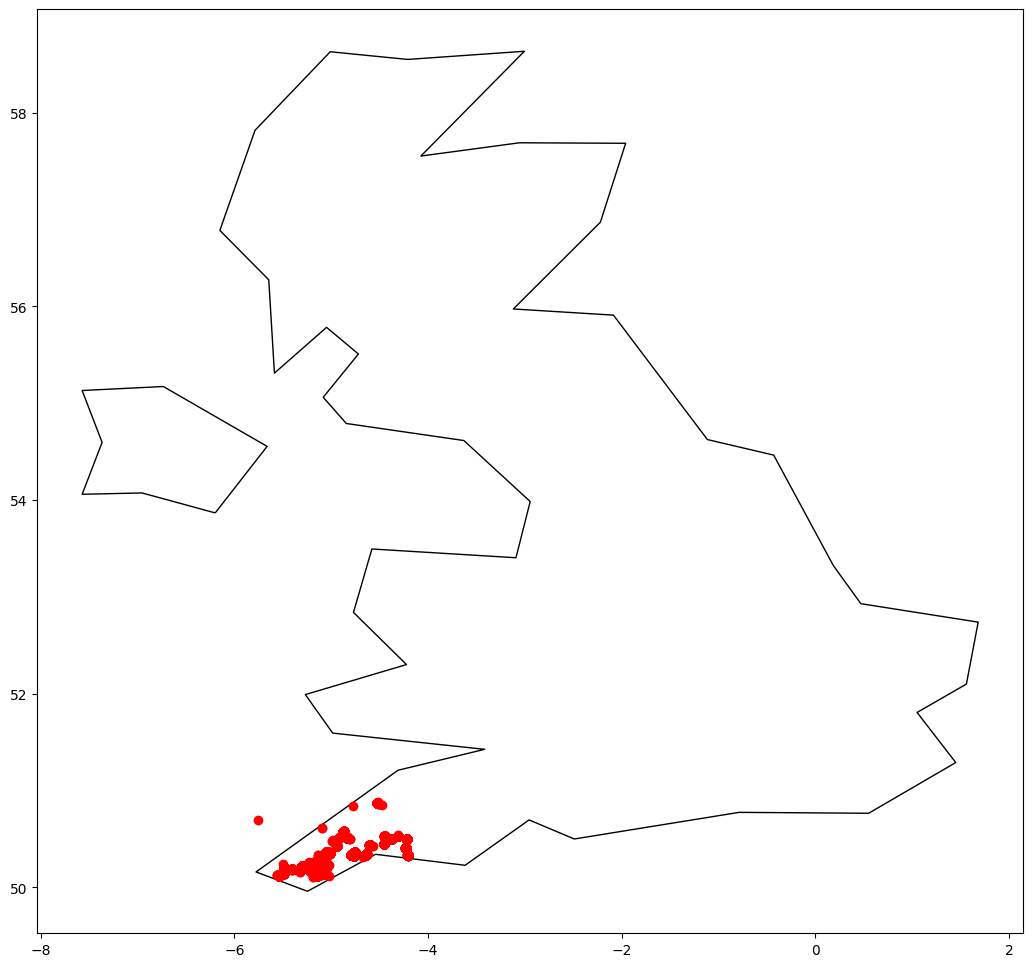

In [19]:
ax = uk.plot(
    color='white', edgecolor='black', figsize=(15,12))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [ ]:
# Where exactly in the UK is this... so we can maximize its visualization on a map
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="PyDataCardiff")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [29]:
# Define a function to get location information given latitude and longitude
def get_location(lat, lon):
    location = geolocator.reverse(f"{lat}, {lon}")
    return location.address

In [31]:
# Apply the get_location function to each row in the DataFrame
gdf['location'] = gdf.apply(lambda row: get_location(row['location_lat'], row['location_long']), axis=1)

In [32]:
gdf.head()

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,...,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years,geometry,location
0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11385 50.17032),"Penvale Crescent, Penryn, Cornwall, England, T..."
1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11385 50.17032),"Penvale Crescent, Penryn, Cornwall, England, T..."
2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11373 50.16988),"Alderwood Parc, Penryn, Cornwall, England, TR1..."
3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11377 50.16983),"Alderwood Parc, Penryn, Cornwall, England, TR1..."
4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11425 50.17014),"Pentire Road, Penryn, Cornwall, England, TR10 ..."


In [34]:
gdf.tail()

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,...,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years,geometry,location
95,Ares,3395610646,True,2017-06-30T20:34:51Z,-5.113612,50.170368,1656,96.08,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11361 50.17037),"Alderwood Parc, Penryn, Cornwall, England, TR1..."
96,Ares,3395610647,True,2017-06-30T20:39:02Z,-5.114130,50.170010,2484,58.37,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11413 50.17001),"Pentire Road, Penryn, Cornwall, England, TR10 ..."
97,Ares,3395610648,True,2017-06-30T22:33:25Z,-5.114210,50.170555,216,95.62,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11421 50.17056),"Pentire Road, Penryn, Cornwall, England, TR10 ..."
98,Ares,3395610649,True,2017-06-30T22:37:08Z,-5.114180,50.170593,0,70.08,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11418 50.17059),"Penvale Crescent, Penryn, Cornwall, England, T..."
99,Ares,3395610650,True,2017-06-30T22:55:01Z,-5.114440,50.170086,720,87.96,False,False,...,m,7.5,2,True,True,False,UK,3.0,POINT (-5.11444 50.17009),"Pentire Road, Penryn, Cornwall, England, TR10 ..."


In [38]:
uk.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
143,66834405.0,Europe,United Kingdom,GBR,2829108,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."


Text(0.5, 1.0, 'Cornwall, UK')

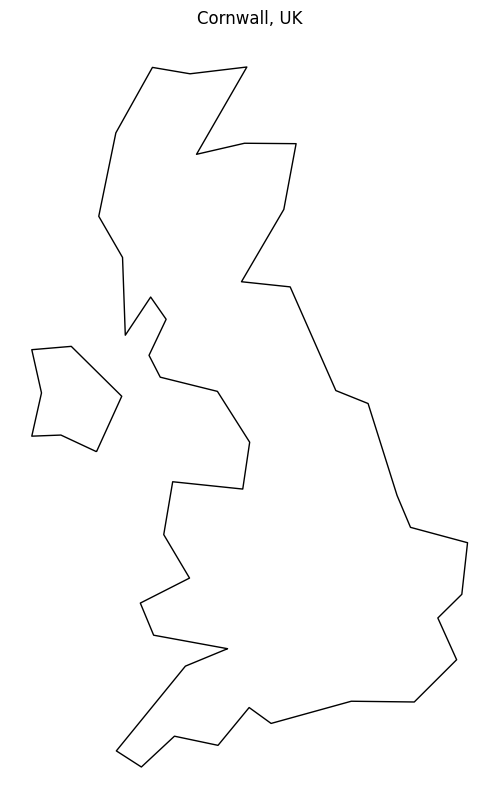

In [35]:

# Filter the data to get only Cornwall
cornwall = uk[uk['name'] == 'United Kingdom']['geometry'].iloc[0]

# Create a new GeoDataFrame for Cornwall
cornwall_gdf = gpd.GeoDataFrame({'geometry': [cornwall]}, crs=uk.crs)

# Plot the map for Cornwall
ax = cornwall_gdf.plot(figsize=(10, 10), color='white', edgecolor='black')
ax.set_axis_off()
ax.set_title('Cornwall, UK')


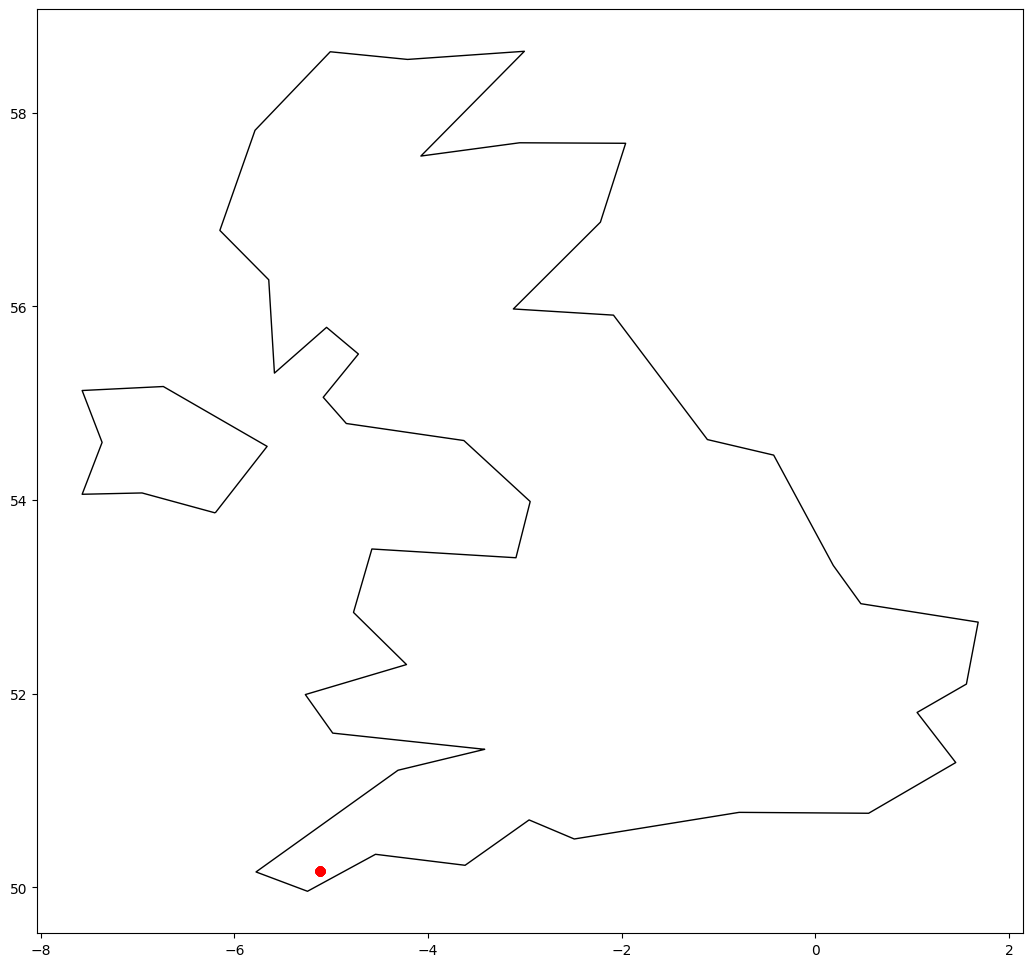

In [37]:
ax = cornwall_gdf.plot(
    color='white', edgecolor='black', figsize=(15,12))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()